https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

In [67]:
pip install kagglehub #библиотека для скачивания с каггл

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#библиотека'


In [68]:
#скачаем последнюю версию с kaggle
import kagglehub

path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ruzho\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


## О наборе данных

Параметры вычисляются на основе оцифрованного изображения тонкоигольной аспирационной биопсии (FNA) образования в молочной железе. Они описывают характеристики клеточных ядер, присутствующих на изображении.

Атрибутивная информация:

* 1)  ID number - Идентификационный номер
* 2)  Diagnosis - Диагноз (M = злокачественный, B = доброкачественный)/(M = malignant, B = benign)
* 3)

* Для каждого клеточного ядра вычисляются десять вещественных признаков:

* а) радиус (среднее значение расстояний от центра до точек на периметре)
* б) текстура (стандартное отклонение значений в градациях серого)
* в) периметр
* г) площадь
* д) гладкость (локальные изменения длины радиуса)
* е) компактность (периметр^2 / площадь - 1,0)
* ж) вогнутость (выраженность вогнутых участков контура)
* з) вогнутые точки (количество вогнутых участков контура)
* и) симметрия
* к) фрактальная размерность («приближение береговой линии» - 1)

Для каждого изображения были вычислены среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее значение из трёх
наибольших значений) из этих характеристик,
в результате чего получилось 30 характеристик. Например, поле 3 — это средний радиус, поле
13 — стандартная ошибка радиуса, поле 23 — наихудший радиус.

Все значения признаков перекодированы четырьмя значащими цифрами.

Отсутствующие значения атрибутов: отсутствуют

Распределение по классам: 357 доброкачественных, 212 злокачественных

https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=944B13EC1D0D6DCB528D22A999948C8E?sequence=1
* ссылка на статью 
## Извлечение ядерных признаков для диагностики опухоли молочной железы
У. Стрит, У. Вольберг, О. Мангасарян
Опубликовано в журнале «Электронная визуализация» 29 июля 1993 г.
Медицина

### Аннотация
Для создания высокоточной системы диагностики опухолей молочной железы были использованы интерактивные методы обработки изображений, а также индуктивный классификатор на основе линейного программирования. Небольшая часть препарата, полученного с помощью тонкоигольной аспирационной биопсии, отбирается и оцифровывается. Это позволяет проводить точный автоматизированный анализ размера, формы и текстуры ядер. Для каждого ядра вычисляются десять таких характеристик, и для диапазона изолированных клеток определяются среднее значение, наибольшее (или «наихудшее») значение и стандартная ошибка каждой характеристики. После анализа таким образом 569 изображений были протестированы различные комбинации характеристик, чтобы найти те, которые лучше всего отделяют доброкачественные образцы от злокачественных. Десятикратная точность перекрестной проверки в 97% была достигнута с использованием одной разделительной плоскости по трем из тридцати признаков: средней текстуре, наихудшей площади и наихудшей гладкости. Это представляет собой улучшение по сравнению с лучшими результатами диагностики в медицинской литературе. В настоящее время система используется в больницах Университета Висконсина. Тот же набор признаков также использовался в гораздо более сложной задаче прогнозирования отдаленного рецидива злокачественной опухоли у пациентов, что привело к точности 86%.

In [69]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных
from sklearn.model_selection import train_test_split            # Импорт функций для разбиения данных на тренировочную и тестовую выборки

from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.svm import SVC                            # Импорт классификатора на основе метода опорных векторов (SVM)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
)

In [70]:
data = pd.read_csv("data/data.csv")
print('Размерность датасета:', data.shape)

Размерность датасета: (569, 33)


In [71]:
# Отображение первых 10 строк набора данных. транспонируем и округлим для визуального удобства
print(data.head(5).round(2).transpose())

                              0       1         2         3         4
id                       842302  842517  84300903  84348301  84358402
diagnosis                     M       M         M         M         M
radius_mean               17.99   20.57     19.69     11.42     20.29
texture_mean              10.38   17.77     21.25     20.38     14.34
perimeter_mean            122.8   132.9     130.0     77.58     135.1
area_mean                1001.0  1326.0    1203.0     386.1    1297.0
smoothness_mean            0.12    0.08      0.11      0.14       0.1
compactness_mean           0.28    0.08      0.16      0.28      0.13
concavity_mean              0.3    0.09       0.2      0.24       0.2
concave points_mean        0.15    0.07      0.13      0.11       0.1
symmetry_mean              0.24    0.18      0.21      0.26      0.18
fractal_dimension_mean     0.08    0.06      0.06       0.1      0.06
radius_se                   1.1    0.54      0.75       0.5      0.76
texture_se          

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* в датасете 1 категориальный признак - диагноз, она же наша таргет переменная. ID и Unnamed - значения, которые можно удалить

In [73]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) # сразу уберем лишние столбцы

In [74]:
# смотрим пропущенные значения
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* пропусков нет

In [75]:
data.duplicated().sum()

0

* дубликатов нет

In [76]:
data.describe().round(2).T #смотрим статистику числовых признаков, с окурглением до 2х знаков и транспонируем таблицу

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension_mean,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [77]:
data.nunique() # посмотрим на уникальные значения

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

* отличное соотношение реально уникальных значений

In [78]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

* смотрим значения таргет переменной

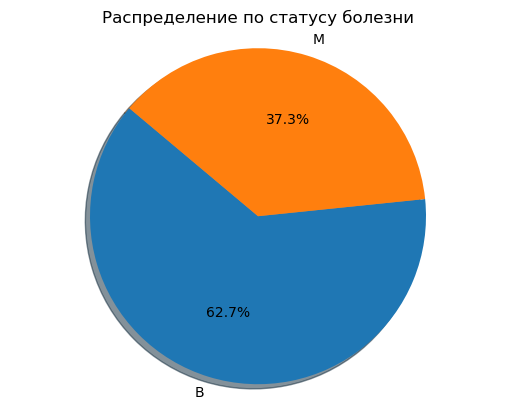

In [79]:
# столбец с ['diagnosis']
dia_counts = data['diagnosis'].value_counts()
# Построение круговой диаграммы
plt.pie(dia_counts, labels=dia_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Убедитесь, что круговая диаграмма круглая
plt.title('Распределение по статусу болезни')
plt.show()

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

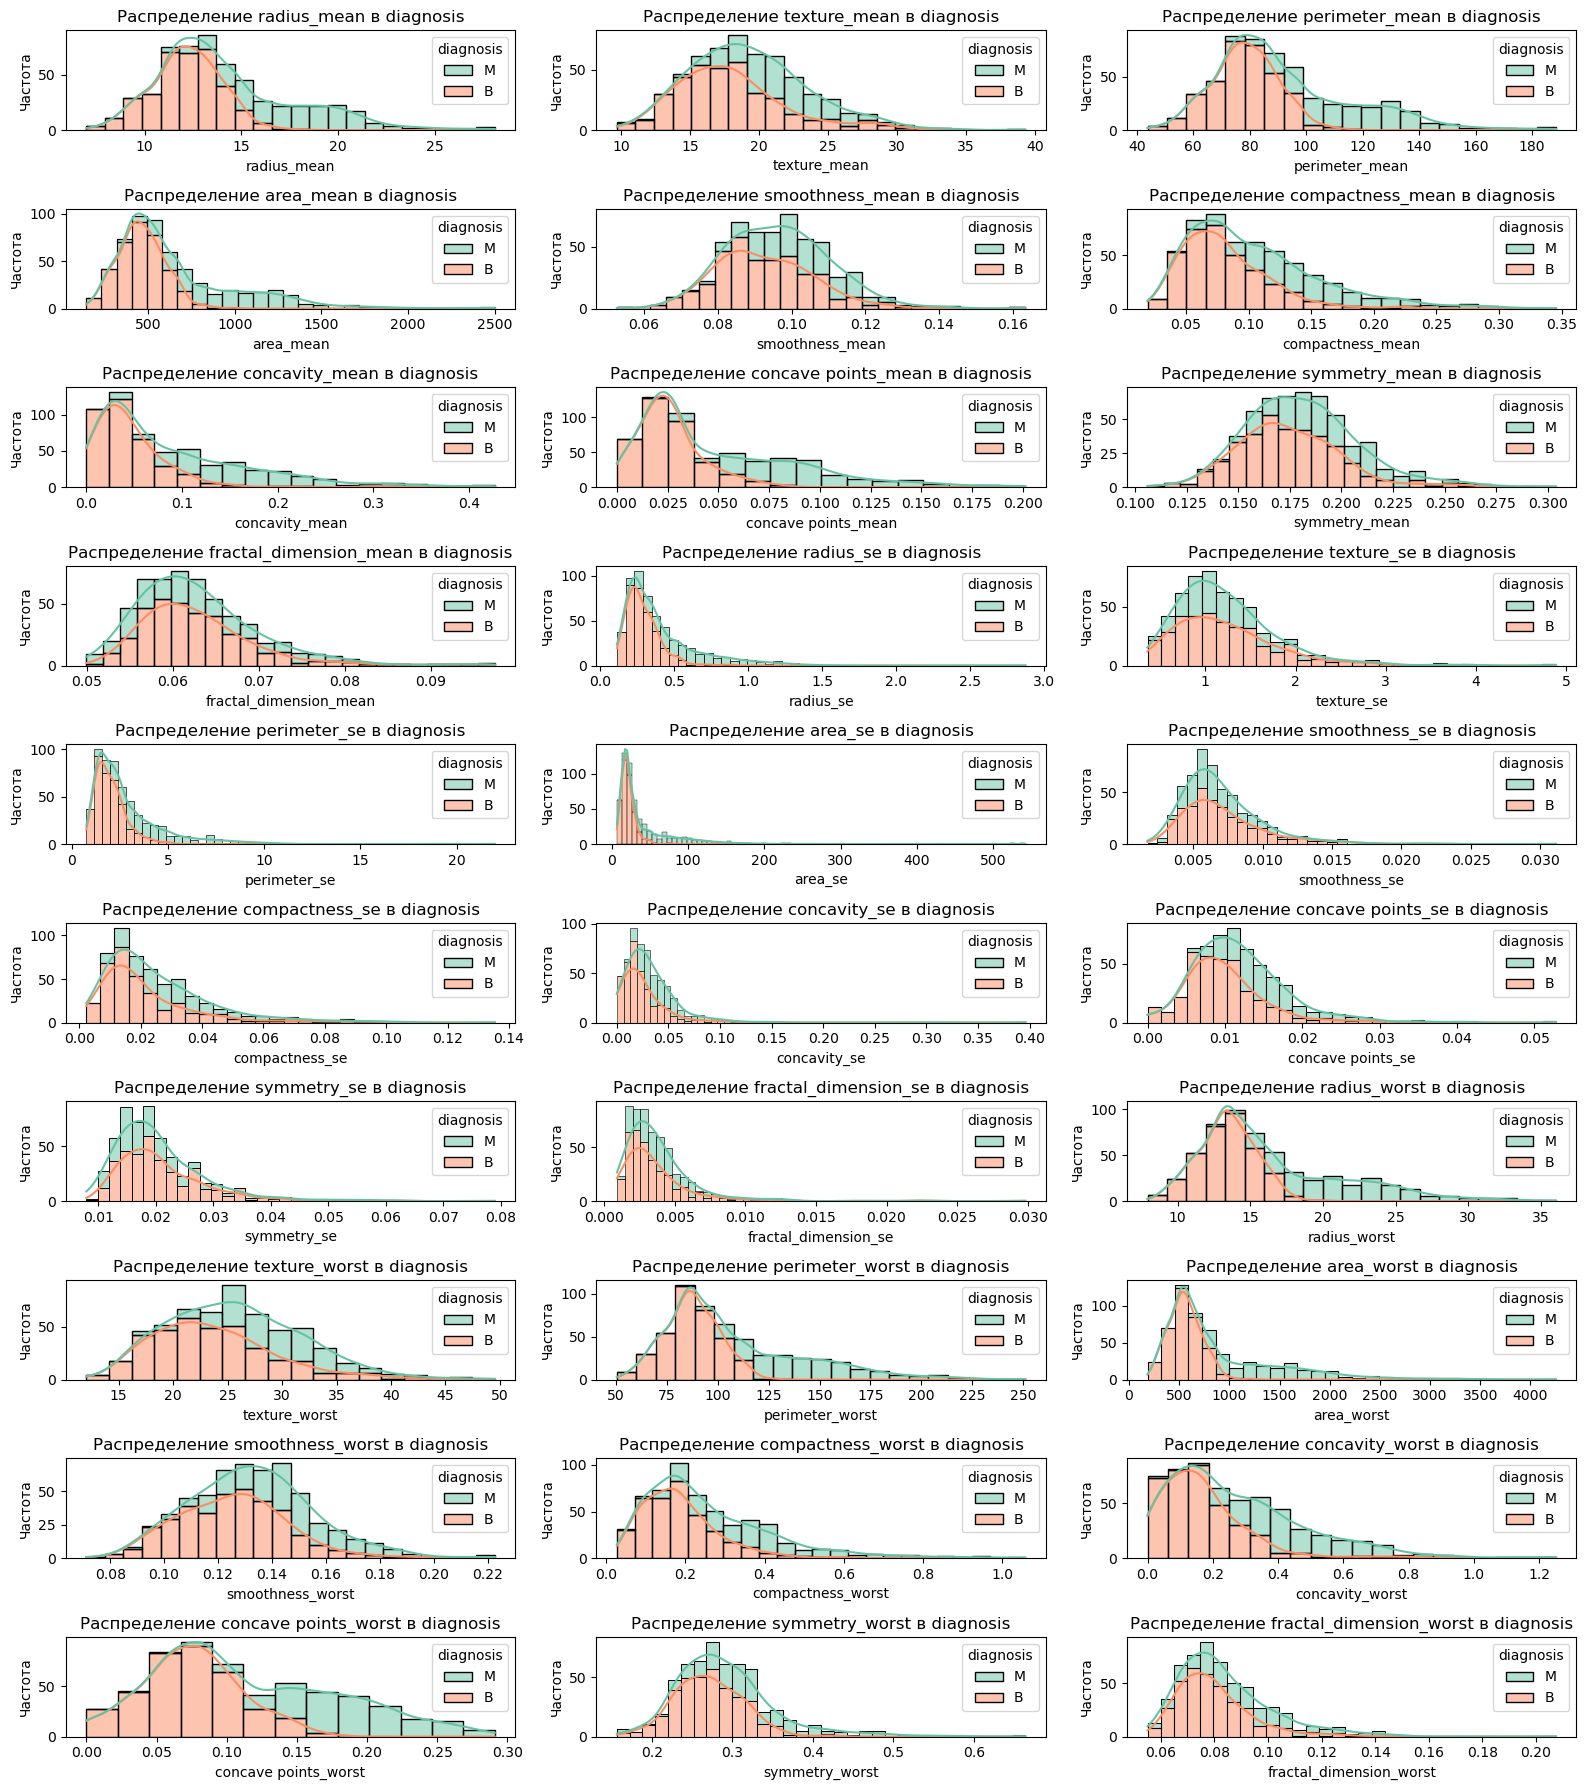

In [80]:
hue = 'diagnosis'

plt.figure(figsize=(16, 18))

rows = (len(data.drop(hue, axis=1).columns) + 2) // 3

for i, col in enumerate(data.drop(hue, axis=1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.histplot(data, x=col, hue=hue, palette="Set2", multiple="stack", kde=True)

    plt.title(f'Распределение {col} в {hue}')

    plt.xlabel(col)

    plt.ylabel('Частота')

plt.tight_layout()

plt.show()

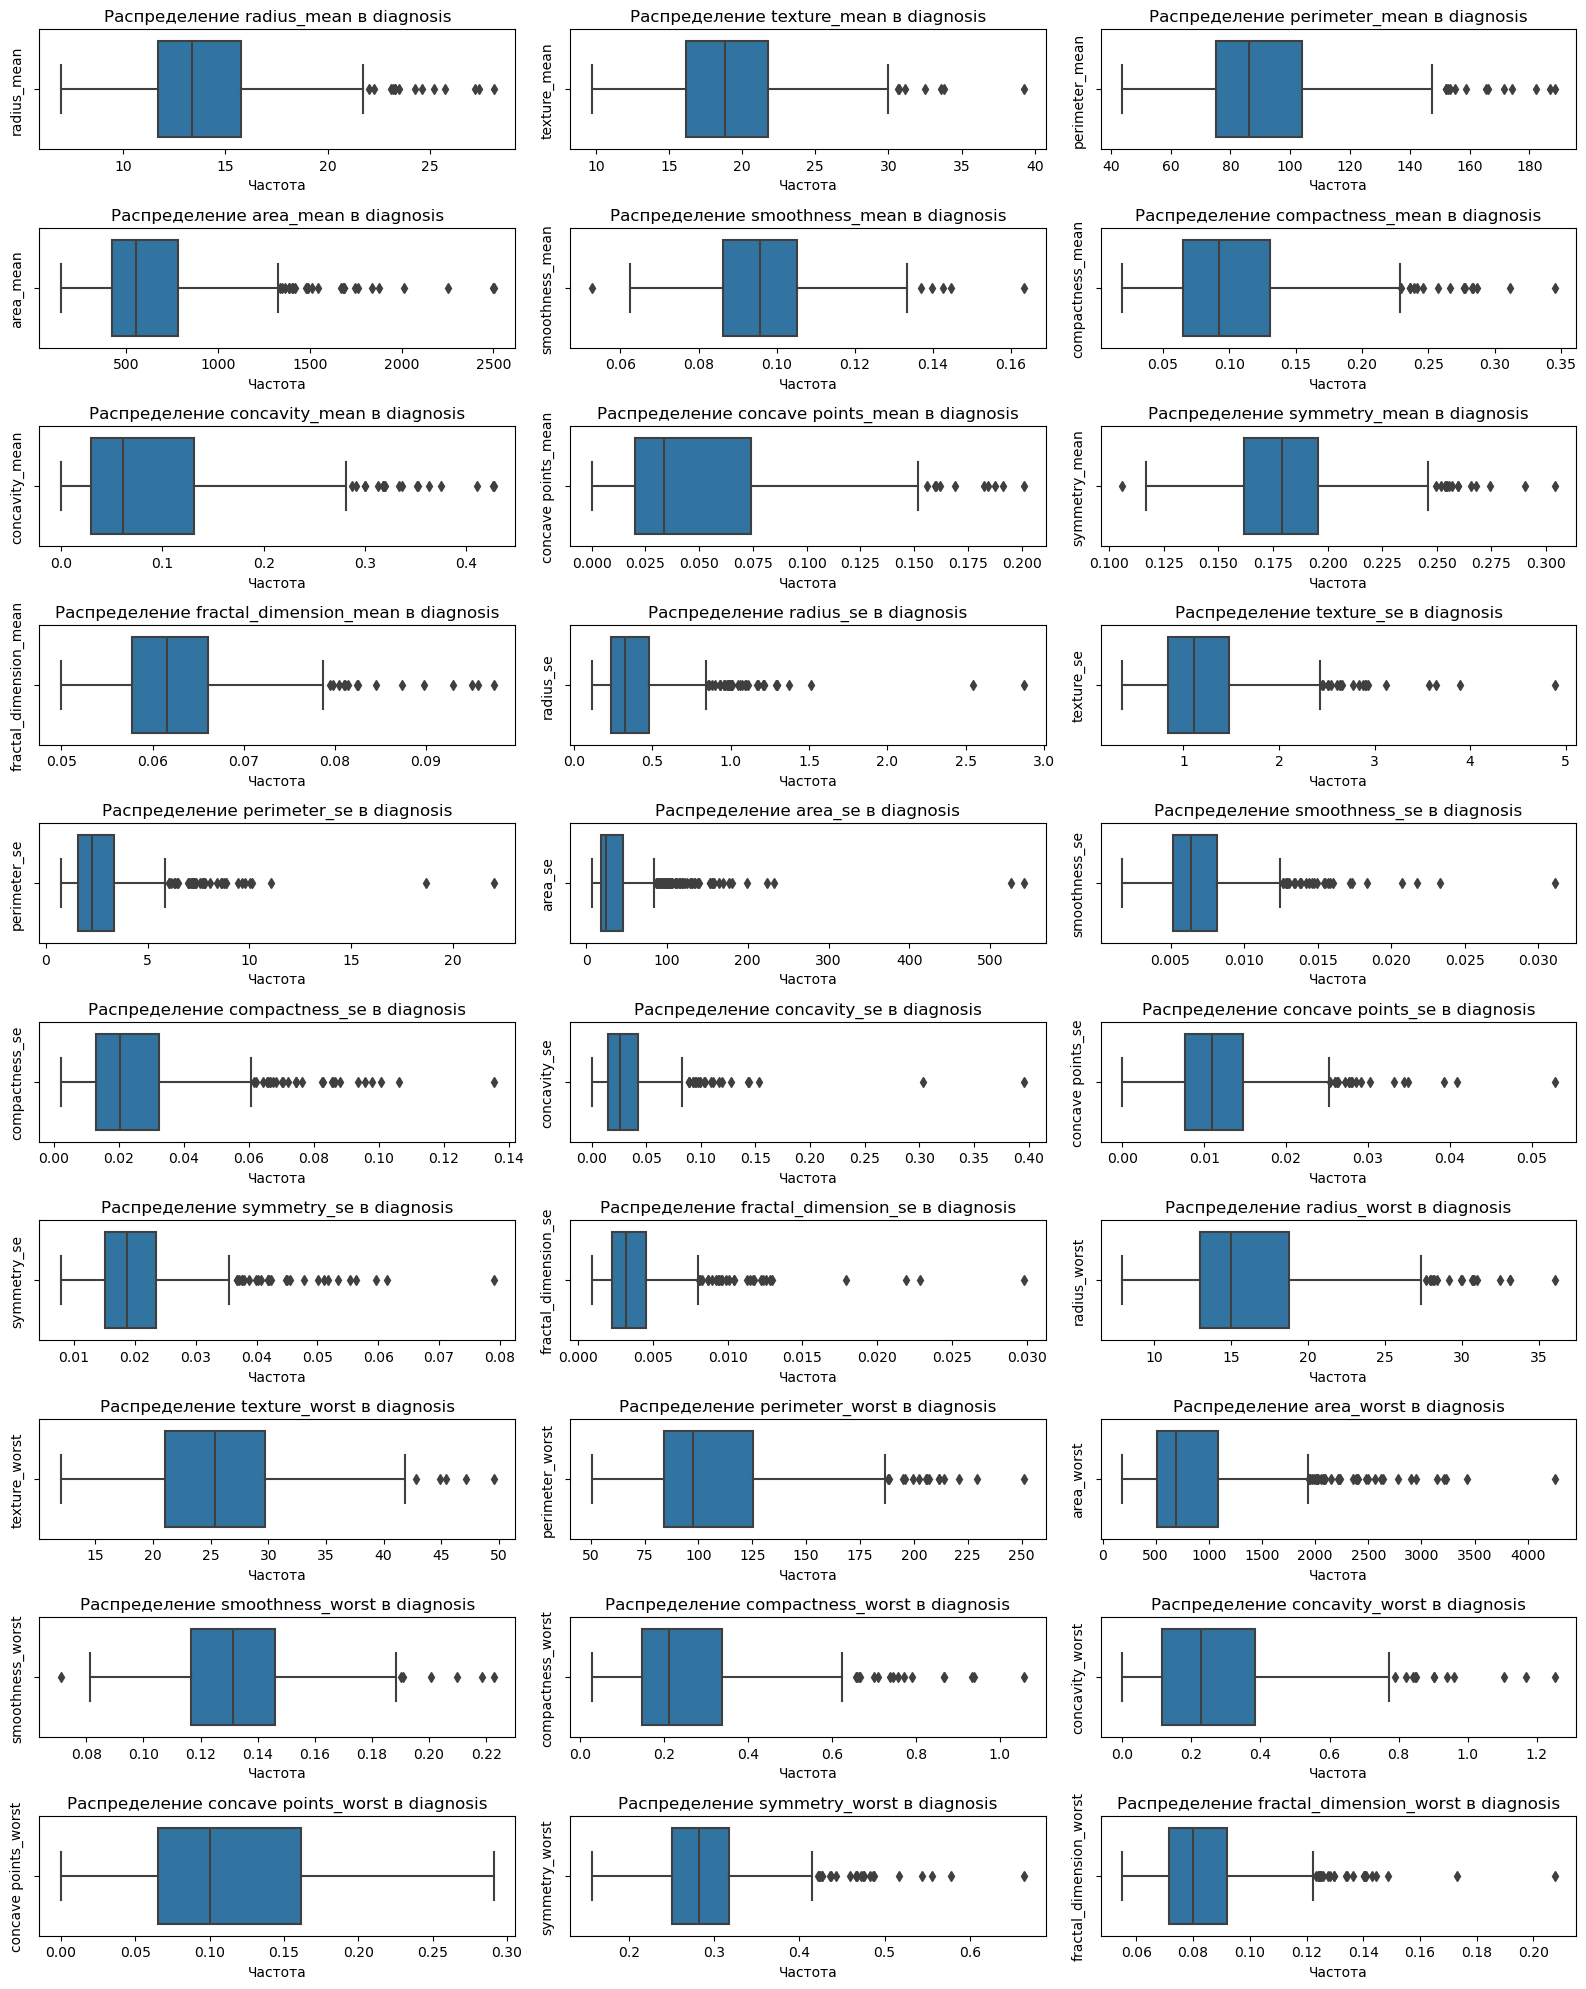

In [ ]:
hue = 'diagnosis'

plt.figure(figsize=(16, 20))

rows = (len(data.drop(hue, axis=1).columns) + 2) // 3

for i, col in enumerate(data.drop(hue, axis=1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.boxplot(data, x=col, hue=hue)

    plt.title(f'Распределение {col} в {hue}')

    plt.ylabel(col)

    plt.xlabel('Частота')

plt.tight_layout()

plt.show()

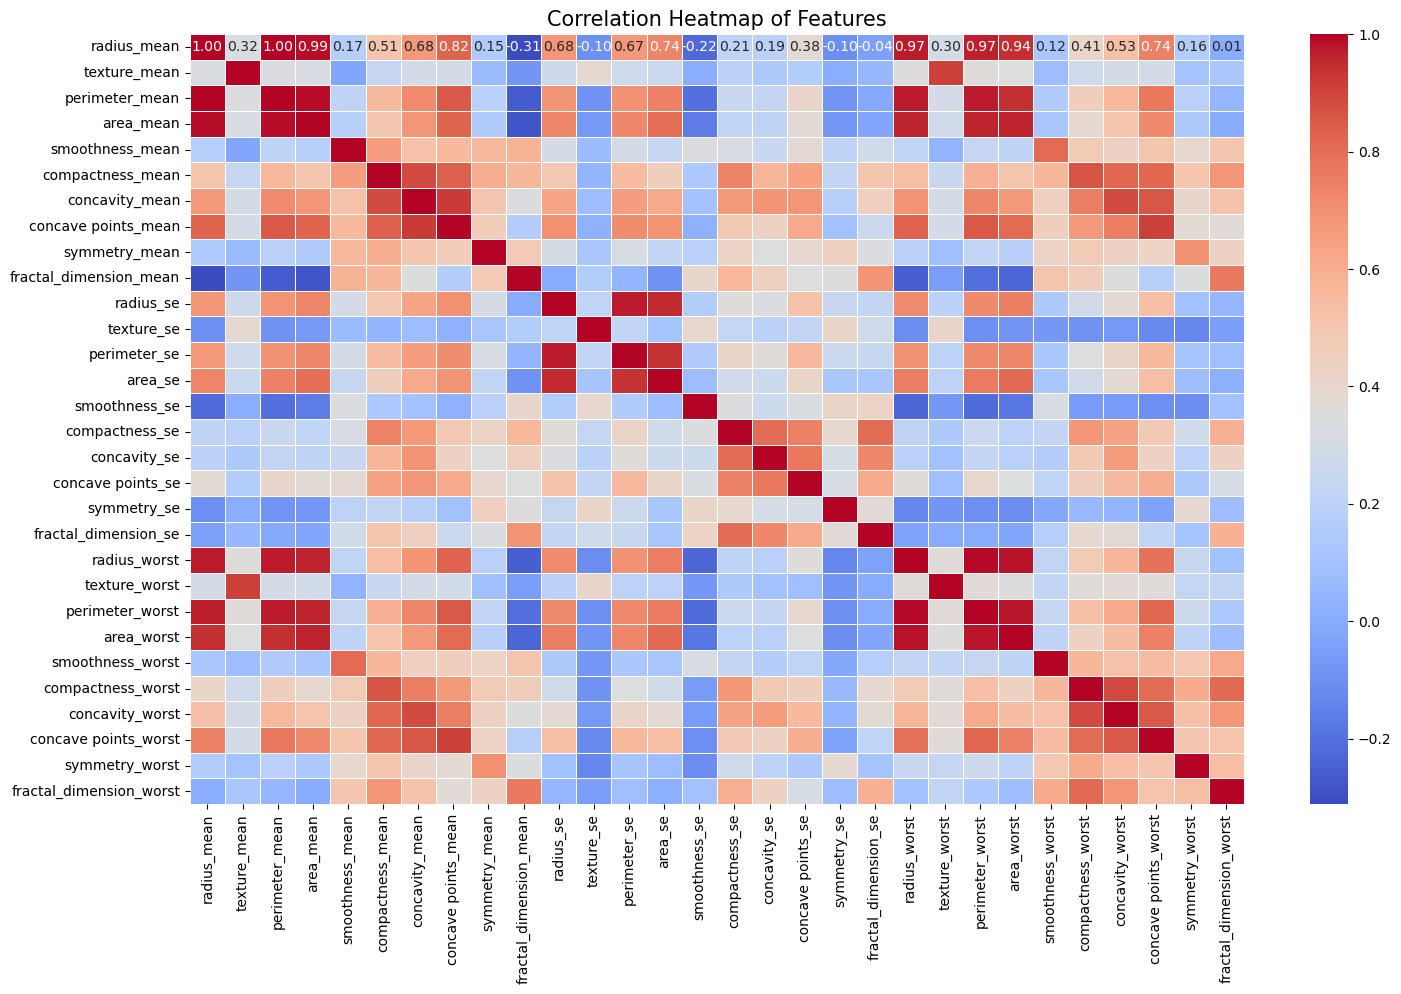

In [ ]:
corr_matrix = data.corr(numeric_only=True)



plt.figure(figsize=(17, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Features', size=15)

plt.show()

In [ ]:
threshold = 0.8  
high_correlation = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold: 
            high_correlation.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_correlation_df = pd.DataFrame(high_correlation, columns=["Variable 1", "Variable 2", "Correlation Coefficient"])
high_correlation_df = high_correlation_df.sort_values(by="Correlation Coefficient", ascending=False)
print(high_correlation_df)

                 Variable 1           Variable 2  Correlation Coefficient
0            perimeter_mean          radius_mean                 0.997855
24          perimeter_worst         radius_worst                 0.993708
1                 area_mean          radius_mean                 0.987357
2                 area_mean       perimeter_mean                 0.986507
30               area_worst         radius_worst                 0.984015
31               area_worst      perimeter_worst                 0.977578
9              perimeter_se            radius_se                 0.972794
21          perimeter_worst       perimeter_mean                 0.970387
15             radius_worst          radius_mean                 0.969539
16             radius_worst       perimeter_mean                 0.969476
20          perimeter_worst          radius_mean                 0.965137
17             radius_worst            area_mean                 0.962746
27               area_worst           

# Encoding

In [ ]:
data["diagnosis"] = data["diagnosis"].map({"M":1, "B":0}) # одна категориальная переменная, переведём в бинарный вид

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
